# 딥러닝(Deep learning)

* 컴퓨터가 많은 양의 데이터를 이용해 마치 사람처럼 스스로 학습할 수 있게 하기 위해 인공 신경망(ANN: artificial neural network)을 기반으로 구축한 기계학습 기술

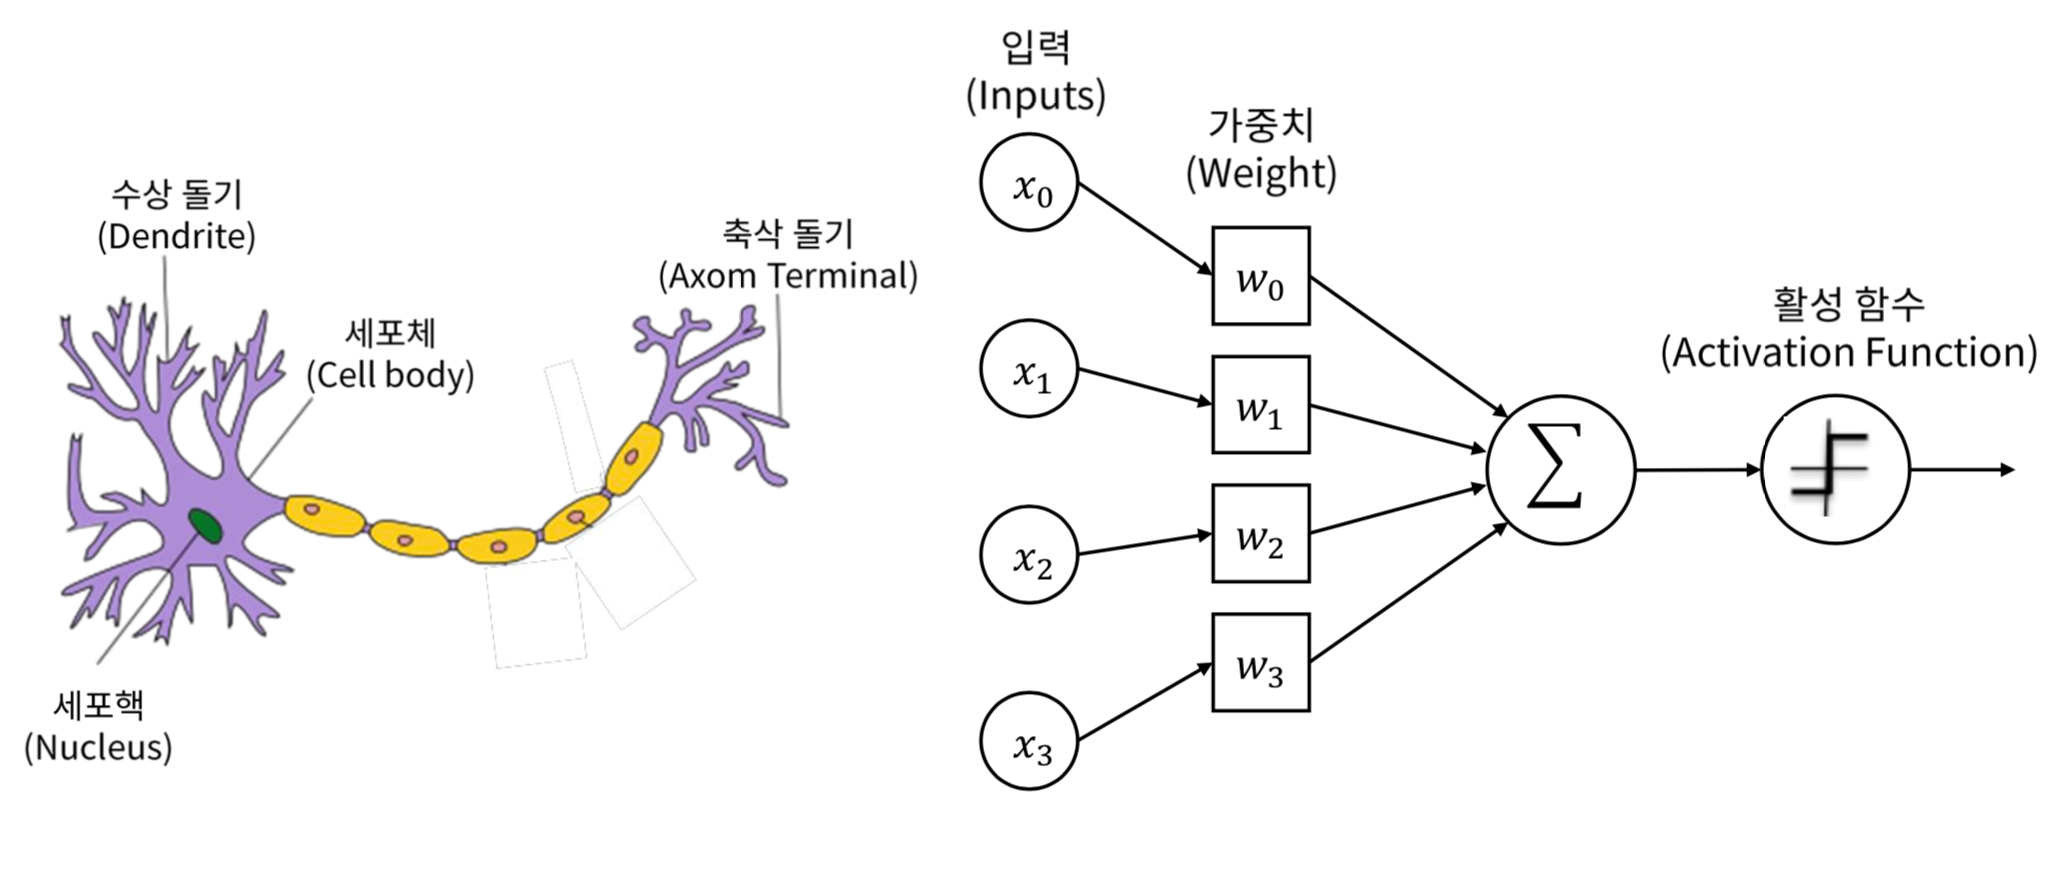

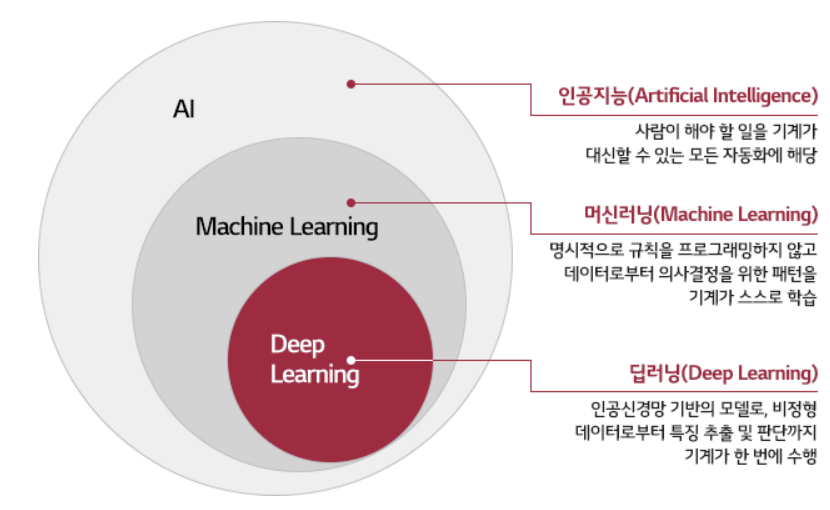

## 인공신경망

* 인간의 두뇌에서 영감을 얻은 방식으로 데이터를 처리하도록 컴퓨터를 가르치는 인공지능 방식

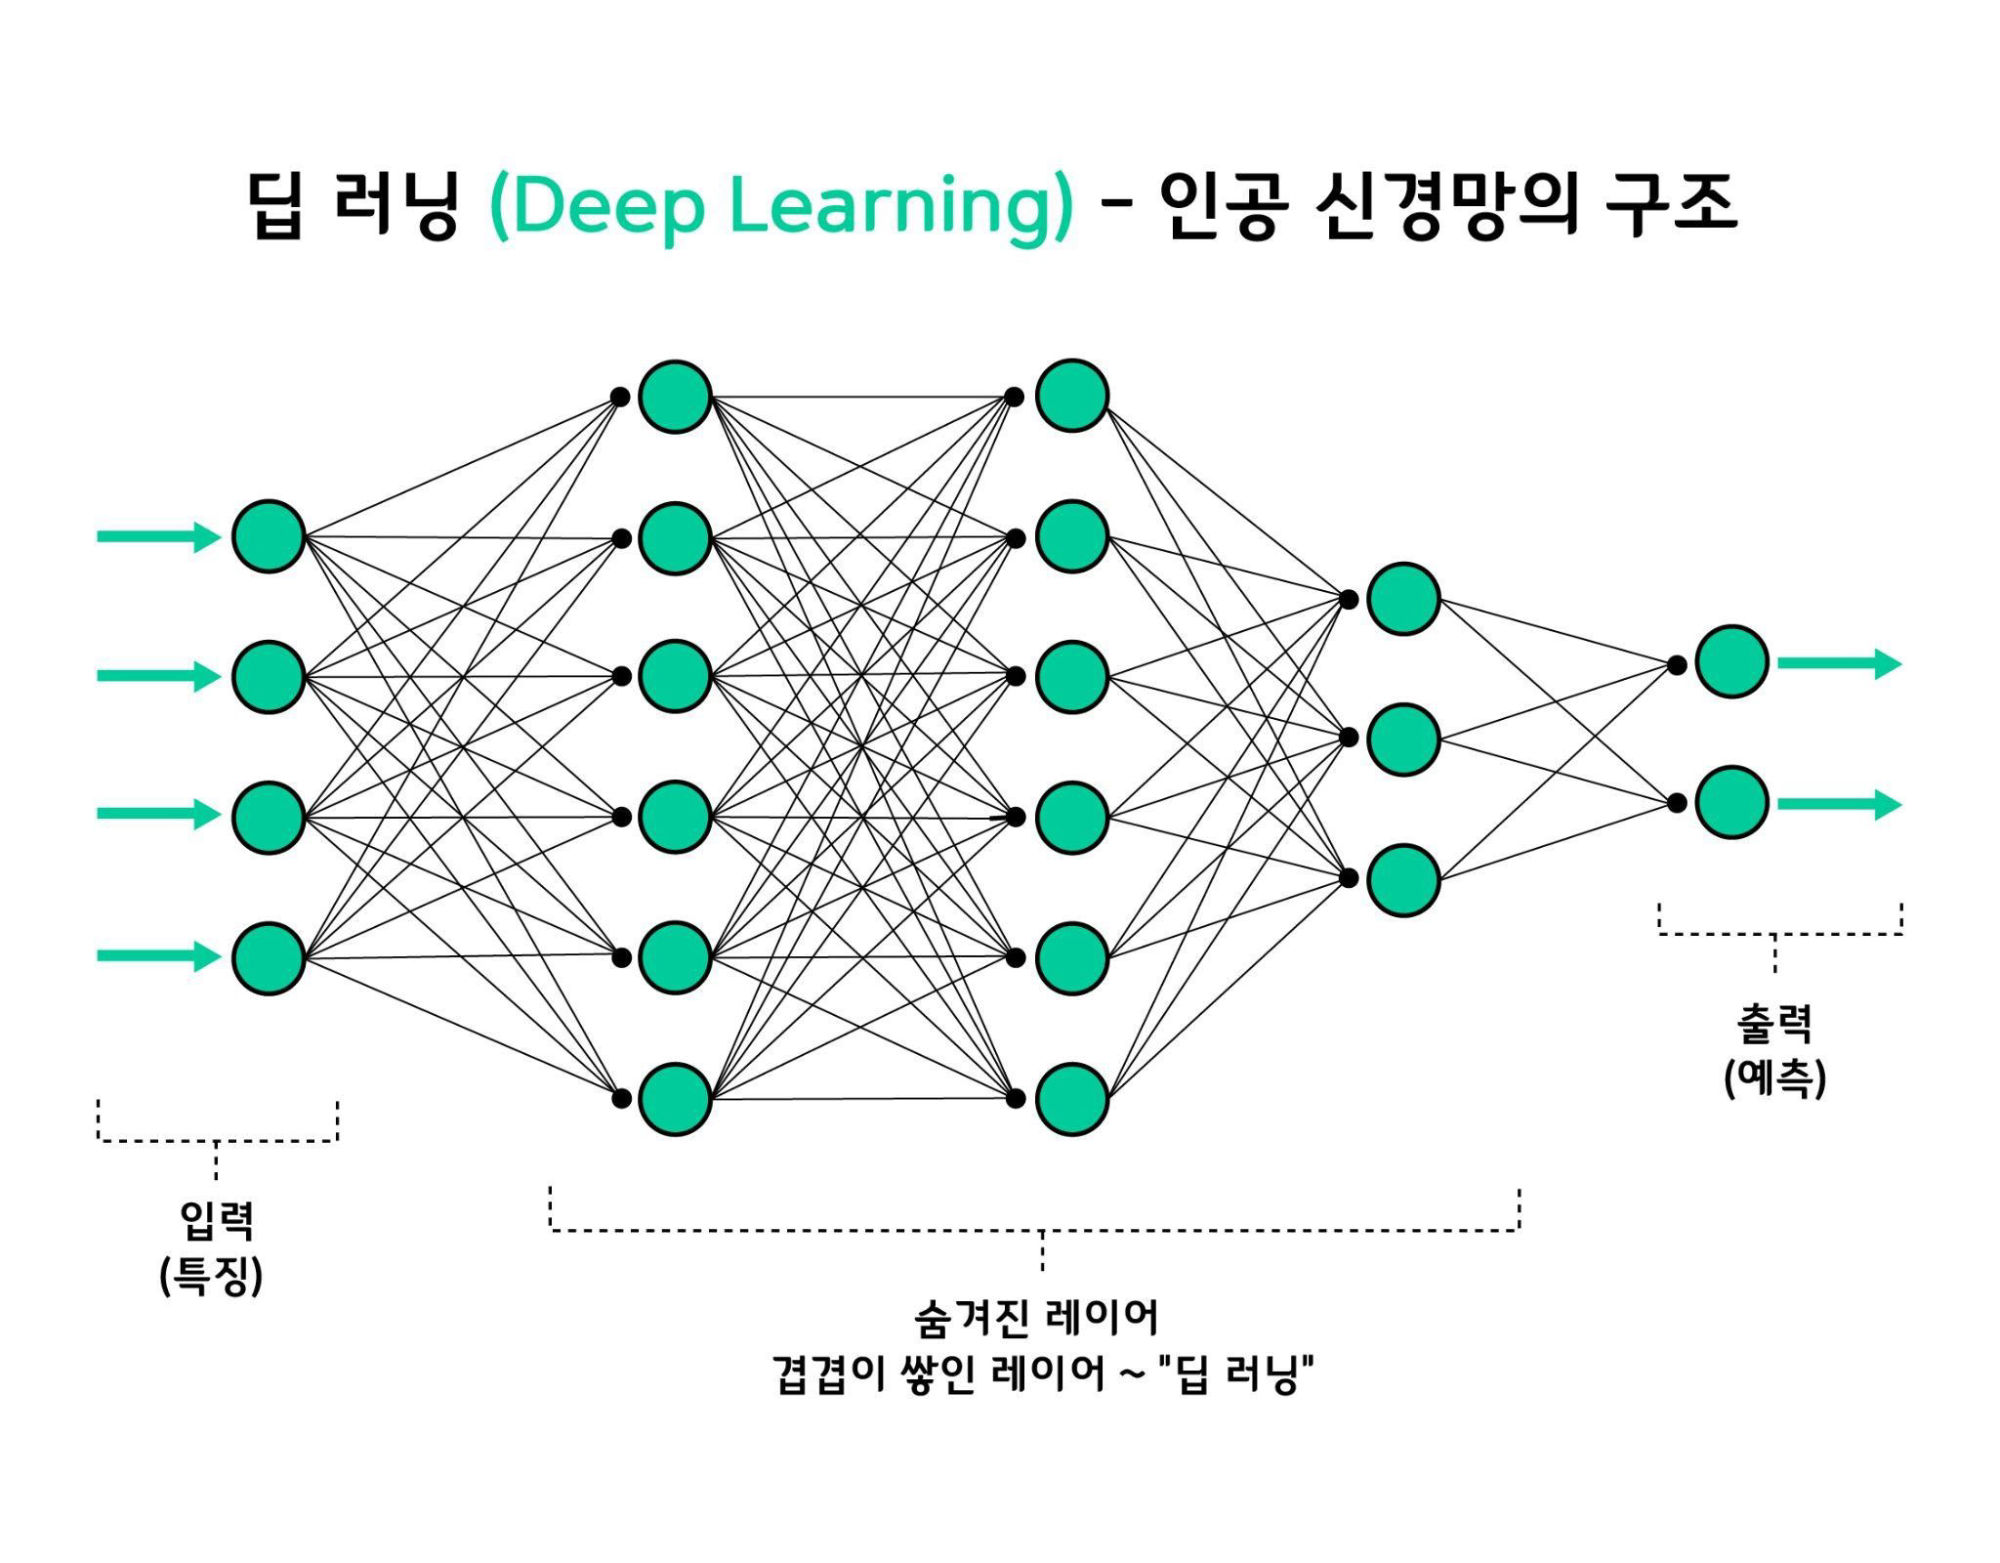

* 딥러닝과 머신러닝은 별개의 것이 아닌, 머신러닝의 하위에 딥러닝이 존재한다고 보면 된다.
* 신경망과 머신러닝의 차이점
    - **은닉층의 존재**: 인공신경망은 의사결정트리, 선형 회귀, SVM과 달리 일반적으로 여러개의 은닉층을 지니며, 이로 인해 복잡한 문제를 해결하는데 뛰어난 성능을 지닌다.
    - **해석 가능성**: 의사결정트리 등의 머신러닝 알고리즘은 구동 과정을 시각화하여 내부 작동을 살펴볼 수 있는 '화이트 박스'인 반면 딥러닝은 내부를 확인하기 힘든 '블랙박스'이다.
    - **feature engineering 필요 여부**: 딥러닝은 모델이 데이터의 특성(feature)을 자동으로 추출할 수 있으며, 이로 인해 전처리과정이 어느정도 단순화되고 고차원 데이터의 복잡한 문제를 푸는데 유리하다. 반면 이외의 머신러닝 알고리즘들은 사용자가 직접 feature를 선택하고 가공해야하며, 이로 인해 전처리 과정이 복잡하다.

### 인공 신경망을 위한 데이터셋 적재

In [1]:
# 필요 패키지 다운로드
!pip install keras

In [2]:
!pip install tensorflow

In [3]:
# keras.datasets 모듈에서 mnist 데이터 import
# MNIST: 손으로 쓴 숫자 이미지 데이터셋(케라스에 포함)
from keras.datasets import mnist

In [4]:
# MNIST 데이터셋 로드
data = mnist.load_data()

In [5]:
# data변수의 타입 및 변환된 값 외의 길이를 출력
print('데이터 셋 타입: ', type(data))
print('반환된 값의 길이: ', len(data))

데이터 셋 타입:  <class 'tuple'>
반환된 값의 길이:  2


In [6]:
# 첫 번째 튜플은 훈련 데이터셋, 두 번째 튜플은 테스트 데이터셋으로 설정
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 훈련 데이터와 테스트 데이터의 형태 출력
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_test.shape)


X_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
X_test shape:  (10000, 28, 28)
y_train shape:  (10000,)


In [7]:
# 위의 튜플은 한글자에 대한 행렬표현이다
import numpy as np
np.set_printoptions(threshold = np.inf, linewidth=np.inf)
X_train[0,:28,:28]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172

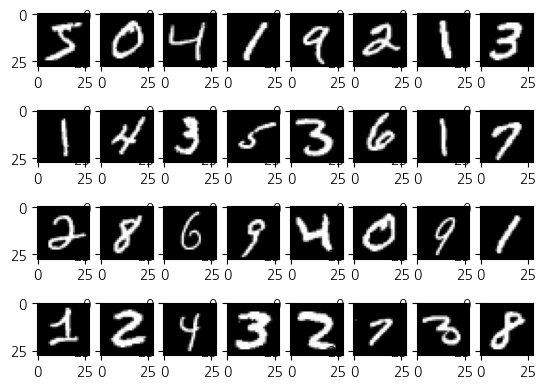

In [8]:
# 텐서로 되어 있는 데이터를 이미지로 확인하기
import matplotlib.pyplot as plt 

# X_train data 60000개 중 처음부터 순차적으로 32개 데이터를 불러와 이미지로 출력
for i in range(0, 32):
    # 서브플롯 생성
    plt.subplot(4, 8, i + 1)
    # 이미지 시각화
    plt.imshow(X_train[i], cmap = 'gray')
# 이미지 출력
plt.show()

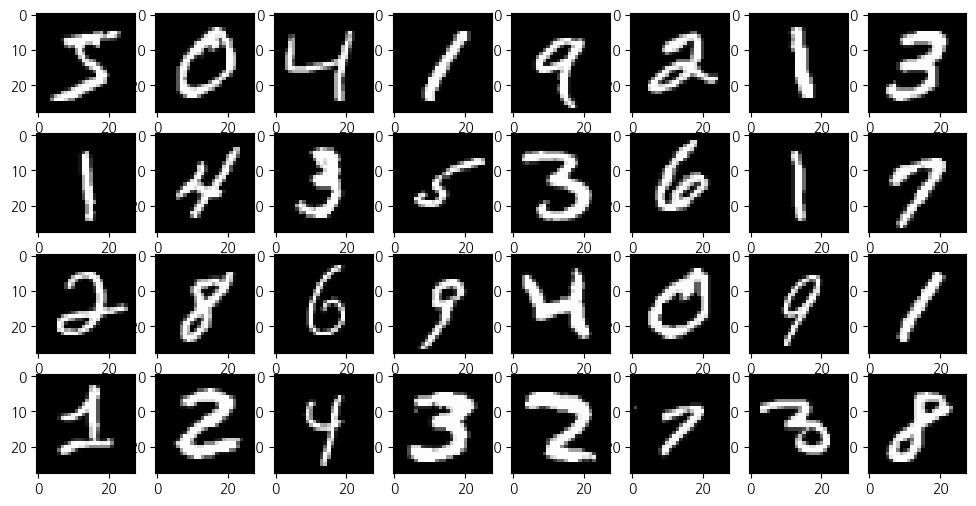

In [9]:
# subplots 사용
fig, axes = plt.subplots(figsize = (12, 6), ncols = 8, nrows = 4)
for i in range(0, 32):
    row = int(i / 8)
    col = i % 8
    axes[row][col].imshow(X_train[i], cmap = 'gray')
plt.show()

In [10]:
# 위의 이미지가 수치로 변환된 결과가 아래의 텐서이다
X_train[:3]

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 2

In [11]:
# 각 이미지는 28x28 형태의 2D 텐서로 표현되며, X_train에는 이러한 2D 텐서가 60,000개 존재
# 데이터 자체는 3D 텐서이다.
X_train.shape

(60000, 28, 28)

In [12]:
# dtype 확인
X_train.dtype

dtype('uint8')

**dtype 'uint8'**

- "unsigned integer 8-bit"의 줄임말이다.
- 부호가 없는(unsigned) 정수(integer)를 나타내는 데이터 타입
- 8비트(1바이트)를 사용하여 표현되며, 부호가 없기 때문에 0부터 시작하여 $2^8-1$ (즉, 255)까지의 정수 값을 저장 가능
- 주로 이미지 처리와 관련된 작업에서 사용되며, 각 픽셀의 색상 채널 값(예: RGB)을 표현하는 데 사용된다.(각 채널의 값은 0부터 255까지의 정수 값으로, 이 범위가 uint8 데이터 타입에 딱 맞음)

## 인공신경망을 사용한 학습

### 퍼셉트론(Perceptron)
* 인공신경망(Aritificial Neural Network, ANN)의 구성요소(unit)로서 다수의 값을 입력받아 하나의 값으로 출력하는 알고리즘
* 뉴런은 수상돌기에서 인접한 다수의 뉴런 내 축삭돌기와 시냅스를 통해 신호를 입력받아 신경세포체에 저장, 해당 뉴런의 저장한 신호의 크기가 특정 값(=임계값) 이상이 될 때만 신호가 축삭돌기를 통해 외부로 전달되기 때문에, 출력신호를 제어할 수 있다.
* 실제 뇌를 구성하는 신경세포 뉴런의 동작과 유사하다.

0. 데이터 입력($x_1, x_2, ...,x_n$)

1. 가중치 곱 산출
  - $w_1=0.7,\;w_2=0.6,\;w_3=1.4,\;...,w_n$
  - $x_1w_1,\;x_2w_2,\;x_3w_3,\;...,x_nw_n$

2. 합산
  - 가중 합계(weighted sum) + 편향(bias)<br>$weighted\;sum=x_1w_1+x_2w_2+x_3w_3+...+x_nw_n+b$

3. 활성화
  - 활성화 함수를 가중합계에 적용하여 최종 결과 출력
  - $output=1\;\;\;if(weighted\;sum\geqq threshold)$<br>
  $output=0\;\;\;if(weighted\;sum<threshold)$

4. 업데이트(경사하강법과 동일)
  - 모델을 통해 산출한 예측값($\hat{y}$)와 실제값($y$)에 차이가 있을 경우 가중치와 편향을 업데이트량($\delta{w_i},\;\delta{b}$) 만큼 업데이트
    - $\delta{w_i}={learning \\; rate}*(y-\hat{y}) *x_i$<br>
    $w_i=w_i+\delta{w_i}$
    - $\delta{b}={learning \\; rate}*(y-\hat{y}) *x_i$<br>
    $b=b+\delta{b}$

5. 원하는 수준의 정확도를 달성하거나 최대 반복 횟수에 도달할 때까지 반복

### 다층 퍼셉트론(Multi-Layer Perceptron, MLP)

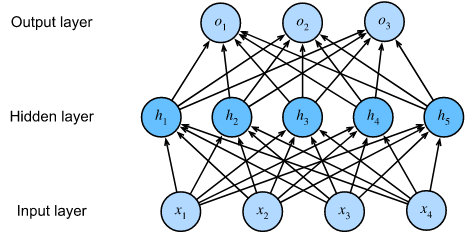

* 다중 퍼셉트론을 하나의 뉴런으로 하여 여러 층의 뉴런들로 구성된 네트워크
* 단층 퍼셉트론과 달리 더 복잡하고 비선형적인 함수를 학습 가능
* 일반적으로 다음의 구조를 포함한다.
    - **입력층(input layer)**: 데이터의 feature를 수신하여 다음 계층으로 전달한다. 이 레이어의 뉴런 수는 입력 데이터의 feature 수에 해당한다.
    - **은닉층(hidden layer)**: 이전 레이어의 뉴런으로부터 출력을 수신해 가중 합계를 계산하고, 편향 항을 추가하고, 활성화 함수(시그모이드, ReLU등)을 적용한다.
    - **출력층(output layer)**: 주어진 작업(분류 또는 회귀)에 대한 최종 예측 또는 점수를 생성한다. 출력 뉴런의 수는 일반적으로 클래스 수(분류용) 또는 대상 변수(회귀용)에 해당한다. 출력 뉴런은 다중 클래스 분류를 위한 softmax 함수 또는 회귀를 위한 항등(identity) 함수등을 활성화 함수로 적용한다.

* 입력층과 출력층 사이 은닉층이 하나 이상인 경우를 다층 퍼셉트론이라 하며, 2개 이상의 수많은 은닉층이 있는 복잡한 아키텍쳐를 지닌 네트워크를 DNN(Deep Neutral Network)라고 한다.
* '딥러닝'의 뜻은 이러한 DNN을 이용하여 학습 및 예측을 수행하는 것이다.

### 다층 퍼셉트론/DNN의 프로세스

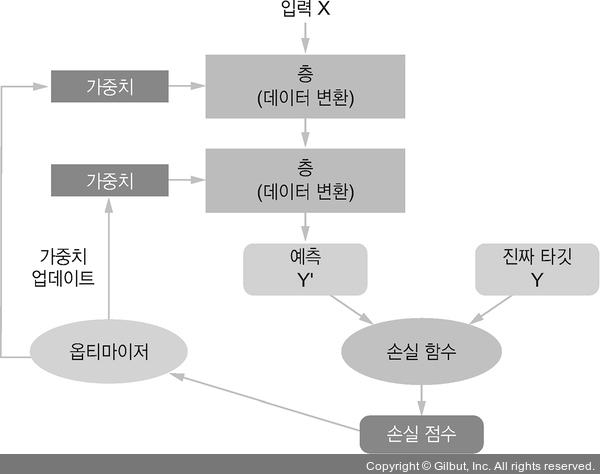

* 입력부터 가중치 곱 연산, 편향 합산, 활성화 함수 적용, 예측까지 하나의 퍼셉트론에서 수행한 단층 퍼셉트론과 달리 각 층의 뉴런들이 역할을 나누어 수행한다.
* 단층 퍼셉트론과 마찬가지로 데이터의 입력부터 순차적으로 단계를 진행하며 예측값과 실제값의 오차(예측오차, 함수로 표현할 시 손실함수)를 계산한다. 이를 전진 패스(Forward pass)라고 한다.
* 이후 가중치와 편향의 업데이트량을 산출하기 위해 예측오차에서부터 데이터 입력까지 역순으로 올라가며 미분을 사용하여 각 단계별로 오차에 대한 기여도를 계산한다. 이를 역방향 패스(Backward pass), 또는 역전파(Backpropagation) 알고리즘이라고 한다.
* **옵티마이저**: 손실함수를 최소화하며 가중치 및 편향을 최적화하는 기법들을 말한다. 확률적 경사하강법(Stochastic Gradient Descent, SGD)가 기본을 이루며, 그 변종들인 RMSProp, Adagrad등이 사용된다.
* 모델은 손실함수가 최소화 되거나 (목적 함수가 달성되거나) 최대 반복수에 이를 때 까지 가중치와 편향을 업데이트하며 최적화를 진행한다.

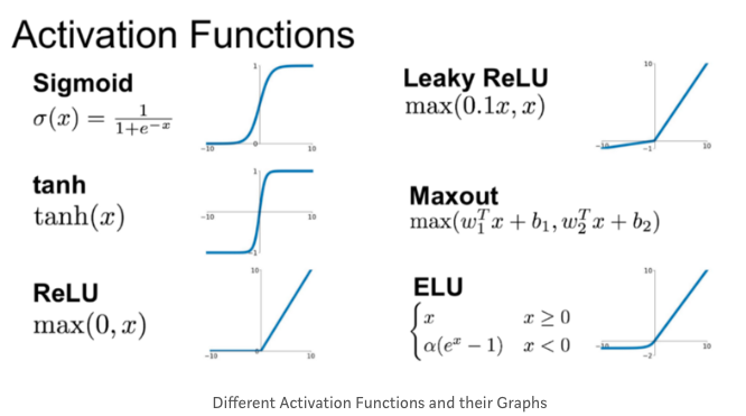

In [13]:
from tensorflow import keras
from keras import layers

# 신경망 생성(Dense 2개층)
model = keras.Sequential([
    # 입력층/은닉층 생성
    # unit(출력 차원) = 512, activation(활성화 함수 설정) = 'relu'
    # relu 함수 = max(0, x) : 들어온 값이 0보다 작으면 0을, 0보다 크면 그 값 그대로 반환
    layers.Dense(512, activation = 'relu'),
    
    # 출력층 생성
    # unit = 10(분류해야 할 클래스가 10개이므로), activation = 'softmax' (softmax 함수를 활성화 함수로 사용)
    # softmax 함수: 다중 클래스 분류에 사용
    layers.Dense(10, activation = 'softmax')
])

In [14]:
# 컴파일 단계
# 최적화 업데이틀를 수행할 옵티마이저로 SDG의 변종인 RMSProp 사용(가장 많이 사용)
model.compile(optimizer = 'rmsprop',
              # 손실함수 설정
             loss = 'sparse_categorical_crossentropy',
             # 모니터링 지표
             metrics = ['accuracy'])

In [15]:
# 학습 데이터 형태 확인
# feature가 28, 28의 2D 텐서로 되어 있므로 이를 1D 텐서로 변환 필요
X_train[0].shape

(28, 28)

In [16]:
# 이미지의 스케일 조정
# 데이터를 2D텐서로 변환 > 따라서 shape는 [60000, 784(=28*28)]가 됨
X_train = X_train.reshape((60000, 28 * 28))

# dtype을 float로 변환 후 0에서 1사이 값을 가지도록 255로 나눠 스케일링
X_train = X_train.astype('float32') / 255

# 테스트 데이터 세트도 마찬가지로 변환 수행
X_test = X_test.reshape((10000, 28 * 28))
X_test = X_test.astype('float32') / 255

In [17]:
# 변환된 데이터 세트 shape 확인
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)

X_train shape:  (60000, 784)
X_test shape:  (10000, 784)


In [18]:
# 모델 훈련
# epochs = 전체 학습 데이터 세트에 대하여 신경망이 학습하는 횟수
# epochs를 늘리면 학습 데이터에 대하여 더 많이 학습할 수 있지만 그만큼 과적합이 발생하여 일반화 성능 하락
# batch_size = 모델이 한번에 학습하는 데이터의 수
# 코드의 경우 학습데이터를 128개씩 나눈 작은 그룹 별로 학습 진행
# batch_size가 커지면 더 많은 데이터를 처리할 수 있어 학습 속도가 빨라지지만, 메모리 사용량도 증가하므로 시스템 리소스에 따라 적절한 값 선택 필요
model.fit(X_train, y_train, epochs = 5, batch_size = 128)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.2646 - accuracy: 0.9247
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1082 - accuracy: 0.9679
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0717 - accuracy: 0.9782
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0518 - accuracy: 0.9843
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0389 - accuracy: 0.9885


### 예측 모델 개발 및 결과 확인

In [19]:
# 예측 모델 만들기

# test데이터 10000개 중 앞에서 부터 10개를 추출하여 test_digits 변수에 저장
test_digits = X_test[0:10]

# 학습한 모델에 입력하여 예측값을 산출하여 predictions 변수에 저장
predictions = model.predict(test_digits)

# 첫번째 예측값 확인
predictions[0]

1/1 [==============================] - 0s 92ms/step


array([1.6605898e-07, 3.6424692e-09, 1.6652000e-05, 9.9985977e-05, 7.3087430e-12, 5.1202743e-08, 1.0033293e-11, 9.9988079e-01, 1.5018139e-07, 2.2594888e-06], dtype=float32)

In [20]:
# 첫번째 숫자 예측
# argmax(): numpy 배열에서 최대값의 index를 반환 = 배열 내 값들은 각 클래스에 대한 예측 확률이므로 예측 클래스 반환
predictions[0].argmax()

7

In [21]:
# 첫번째 숫자의 실제값 확인
y_test[0]

7

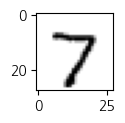

In [22]:
# 첫번째 숫자를 이미지로 확인
digit = X_test[0]
digit = digit.reshape(28, 28)
fig = plt.figure(figsize = (1, 1))
# cmap=plt.cm.binary : 흰색과 검은색만으로 구성하도록 함
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

In [23]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'테스트 정확도: {test_acc}')

313/313 [==============================] - 1s 1ms/step - loss: 0.0652 - accuracy: 0.9781
테스트 정확도: 0.9781000018119812


## 텐서플로우

* 구글에서 개발한 오픈소스 기계학습 프레임워크
* 대규모 수치 계산을 수행할 수 있는 라이브러리
* 머신러닝과 딥러닝 모델을 구현하고 학습시키기 위한 다양한 기능들을 제공한다.
* 텐서플로우를 사용하기 위해서는 "그래프(Graph)"라는 개념 이해 필요하다.

### 텐서
* ndim: 속성을 사용하면 넘파이 계열의 축 개수를 확인할 수 있다.
* 랭크(rank): 텐서의 축 개수

#### 스칼라(랭크-0 텐서, 0D 텐서)
* 하나의 숫자만 담고 있는 텐서 (예: 12)

#### 벡터(랭크-1 텐서, 1D 텐서)
* 숫자의 배열 (예: [21, 3, 6, 14, 7])
* 하나의 축을 가진다

#### 행렬(랭크-2 텐서, 2D 텐서)
* 행렬에는 행과 열 2개의 축을 가진다.

#### 랭크-3 텐서와 더 높은 랭크의 텐서
* 랭크-3 텐서들을 하나의 배열로 합치면 랭크-4 텐서를 만드는 식으로 이어진다.

### 상수 텐서와 변수

In [24]:
import tensorflow as tf
# np.ones(shape=(2, 1))와 동일
x = tf.ones(shape = (2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [25]:
import numpy as np
n = np.ones(shape = (2, 1))
print(f'({n}, shape = {n.shape}, dtype = {n.dtype})')

([[1.]
 [1.]], shape = (2, 1), dtype = float64)


In [26]:
# np.zeros(shape=(2, 1))와 동일
x = tf.zeros(shape = (2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [27]:
n = np.zeros(shape = (2, 1))
print(f'({n}, shape = {n.shape}, dtype = {n.dtype})')

([[0.]
 [0.]], shape = (2, 1), dtype = float64)


In [28]:
# 랜덤 텐서
# mean: 평균 / stddev: 표준편차
x = tf.random.normal(shape = (3, 1), mean = 0., stddev = 1.)
print(x)

# minval: 최소값., maxval: 최대값
x = tf.random.uniform(shape = (3, 1), minval = 0., maxval = 1.)
print(x)

tf.Tensor(
[[ 0.90181345]
 [-0.24226558]
 [ 0.04478498]], shape=(3, 1), dtype=float32)
tf.Tensor(
[[0.32007635]
 [0.59951353]
 [0.5597489 ]], shape=(3, 1), dtype=float32)


In [29]:
# 텐서플로우 변수 만들기
# tf.Variable(): 텐서값을 저장하는 변수, initial_value: 변수의 초기값 지정
v = tf.Variable(initial_value = tf.random.normal(shape = (3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.8723393],
       [-0.8574394],
       [ 0.9243962]], dtype=float32)>


In [30]:
# 텐서에 변수값 할당

# assign: 새로운 값 할당
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [31]:
# tf.zeros(): 모든 원소가 0인 텐서 생성 함수
v.assign(tf.zeros((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[0.],
       [0.],
       [0.]], dtype=float32)>

In [32]:
# tf.fill(): 지정한 값으로 채워진 텐서 생성 함수
v.assign(tf.fill((3, 1), 2.))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[2.],
       [2.],
       [2.]], dtype=float32)>

In [33]:
# tf.constant(): 상수(constant) 값을 가지는 텐서 생성 함수
tf.constant([1, 2, 3, 4, 5])

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([1, 2, 3, 4, 5])>

* tf.add(): 두 개의 텐서를 더하는 함수
* tf.subtract(): 두 개의 텐서를 빼는 함수
* tf.multiply(): 두 개의 텐서를 곱하는 함수
* tf.divide(): 두 개의 텐서를 나누는 함수

In [34]:
# 기존값에 +, -
a = v.assign_add(tf.ones((3, 1)))
print(a)

b = v.assign_sub(tf.ones((3, 1)))
print(b)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [3.],
       [3.]], dtype=float32)>
<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[2.],
       [2.],
       [2.]], dtype=float32)>


In [35]:
# 텐서플로우를 이용한 배열 생성
t = tf.Variable(initial_value = [[1, 2], [3, 4]], dtype = tf.float32)
print(t)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[1., 2.],
       [3., 4.]], dtype=float32)>


In [36]:
# 텐서플로우의 연산
b = tf.square(t)
print(b)

c = tf.sqrt(b)
print(c)

d = b + c
print(d)

e = b - c
print(e)

f = b / c
print(f)

tf.Tensor(
[[ 1.  4.]
 [ 9. 16.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 2.  6.]
 [12. 20.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 0.  2.]
 [ 6. 12.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)
